In [1]:
import sys
import os

# get path to data and models
parent_path = os.getcwd()

# get the path to dataset
data_path = parent_path.replace('src\\notebooks', 'data')


In [2]:
# import libraries
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [3]:
# read csv
road_deaths_data = pd.read_csv(data_path + '\\raw\\Australian_Road_Deaths.csv')
road_deaths_df = pd.DataFrame(road_deaths_data)
road_deaths_df

,Crash ID,State,YYYYMM,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Road User,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20212133,Vic,202109,Sunday,0:30:00,Single,NaN,NaN,NaN,Motorcycle rider,...,89,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night
1,20214022,SA,202109,Saturday,23:31:00,Multiple,No,No,No,Pedestrian,...,0,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night
2,20212096,Vic,202109,Saturday,23:00:00,Single,NaN,NaN,NaN,Car passenger,...,0,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night
3,20212145,Vic,202109,Saturday,22:25:00,Single,NaN,NaN,NaN,Car driver,...,117,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night
4,20212075,Vic,202109,Saturday,5:15:00,Single,NaN,NaN,NaN,Motorcycle rider,...,92,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,201401,Monday,18:20:00,Single,No,No,No,Car passenger,...,0,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night
9136,20141285,NSW,201401,Tuesday,20:50:00,Single,No,No,No,Car driver,...,91,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night
9137,20143125,Qld,201401,Friday,1:00:00,Single,No,No,No,Motorcycle pillion Car passenger,...,0,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night
9138,20143065,Qld,201401,Friday,10:00:00,Multiple,No,No,Yes,Car driver,...,75,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day


In [4]:
# Date time formatting
road_deaths_df["YYYYMM"] = pd.to_datetime(road_deaths_df["YYYYMM"], format='%Y%m')
road_deaths_df["YYYYMM"] = road_deaths_df["YYYYMM"].dt.to_period("M")
year_value = road_deaths_df["YYYYMM"].dt.year 
month_value = road_deaths_df["YYYYMM"].dt.month
road_deaths_df.insert(loc=3, column="Year", value=year_value)
road_deaths_df.insert(loc=4, column="Month", value=month_value)
road_deaths_df


,Crash ID,State,YYYYMM,Year,Month,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20212133,Vic,2021-09,2021,9,Sunday,0:30:00,Single,NaN,NaN,...,89,12,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Night
1,20214022,SA,2021-09,2021,9,Saturday,23:31:00,Multiple,No,No,...,0,6,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Night
2,20212096,Vic,2021-09,2021,9,Saturday,23:00:00,Single,NaN,NaN,...,0,2,Inner Regional Australia,Hume,Wangaratta (RC),Access Road,No,No,17_to_25,Night
3,20212145,Vic,2021-09,2021,9,Saturday,22:25:00,Single,NaN,NaN,...,117,5,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Night
4,20212075,Vic,2021-09,2021,9,Saturday,5:15:00,Single,NaN,NaN,...,92,11,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,20142068,Vic,2014-01,2014,1,Monday,18:20:00,Single,No,No,...,0,6,NaN,NaN,NaN,NaN,No,No,26_to_39,Night
9136,20141285,NSW,2014-01,2014,1,Tuesday,20:50:00,Single,No,No,...,91,43,NaN,NaN,NaN,NaN,No,No,65_to_74,Night
9137,20143125,Qld,2014-01,2014,1,Friday,1:00:00,Single,No,No,...,0,1,NaN,NaN,NaN,NaN,No,No,17_to_25,Night
9138,20143065,Qld,2014-01,2014,1,Friday,10:00:00,Multiple,No,No,...,75,12,NaN,NaN,NaN,NaN,No,No,26_to_39,Day


In [5]:
# Remove the records with missing values, undetermined values, unspecified values, and duplicates

# remove missing values
road_deaths_df.dropna(axis=0, how='any', inplace=True)

# remove undetermined and unspecified values
road_deaths_df = road_deaths_df[(road_deaths_df["National Road Type"] != "Undetermined") & (road_deaths_df["Gender"] != "Unspecified")]

# remove duplicate
clean_data = road_deaths_df.drop_duplicates()

# reset index
clean_data.reset_index(drop=True, inplace=True)

In [6]:
# Wrangle counter-intuitive data in Age column

# Identify
counter_intuitive_values = clean_data.loc[clean_data["Age"] - clean_data["Driving experience"] < 0, ["Age", "Road User", "Driving experience"]]
counter_intuitive_values = pd.DataFrame(counter_intuitive_values)
counter_intuitive_values


,Age,Road User,Driving experience
1,2,Car passenger,3
19,-999,Car driver,40
22,20,Car driver,62
46,-999,Car driver,40
58,20,Car driver,63
...,...,...,...
6391,0,Car passenger,2
6524,0,Car passenger,2
6591,1,Car passenger,5
6717,38,Pedal cyclist,61


In [7]:
# Relationship between age and driving experience
list_of_drivers = ["Car driver", "Motorcycle rider",
"Pedal cyclist", "Other vehicle driver"]
riders = clean_data[clean_data["Road User"].isin(list_of_drivers)]
riders = riders[["Road User", "Age", "Driving experience"]]
riders = riders.sort_values("Road User")
riders.reset_index(inplace=True, drop=True)
riders.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23420\3719259279.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  riders.corr()


,Age,Driving experience
Age,1.000000,0.612136
Driving experience,0.612136,1.000000


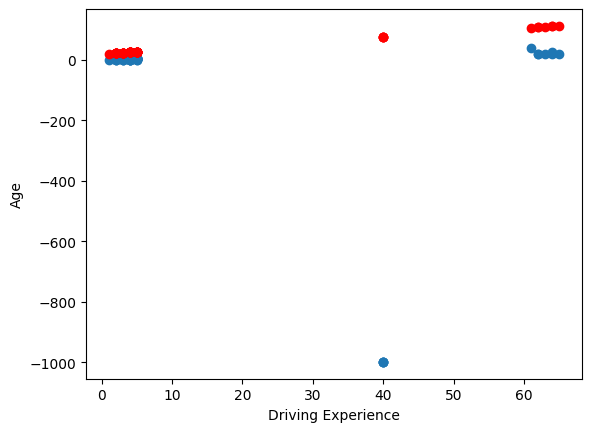

In [8]:
# We can use linear regression from scikit-learn to replace the data points with counter intuitive data
# let x = driving experience[without counter intuitive data]
# let y = age[without counter intuitive data]
# let y_predict = age[with counter intuitive data]

# Extract columns

# Training data
data_without_counter_intuitive = clean_data.loc[clean_data["Age"] - clean_data["Driving experience"] >= 0, ["Age", "Driving experience"]]
x = data_without_counter_intuitive["Driving experience"].values.reshape(-1, 1)
y = data_without_counter_intuitive["Age"].values.reshape(-1, 1)

# counter intuitive data
x_ = counter_intuitive_values["Driving experience"].values.reshape(-1, 1)
y_ = counter_intuitive_values["Age"]

# Using regression to fit
model = LinearRegression()
model.fit(x, y)

# predicted data from counter intuitive data
y_predict = model.predict(x_)

true_age = y_predict

# plot for better visualization
plt.scatter(x_, y_)
plt.scatter(x_, y_predict, color = 'red')
plt.xlabel('Driving Experience')
plt.ylabel('Age')
plt.show()

In [9]:
# replace the data 
true_age = true_age.flatten().astype(int) # convert to int
counter_intuitive_values["Age"] = true_age
replaced_data = counter_intuitive_values

In [10]:
# join to the clean_data data frame
clean_data = clean_data.join(replaced_data, how='left', lsuffix='index')

In [11]:
# export clean data as csv file to data folder
clean_data.to_csv(data_path + '\\processed\\clean_ARD.csv', index=False)